In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

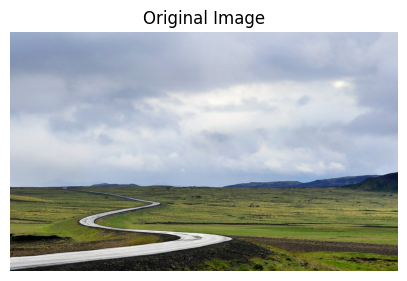

In [10]:
# Load the image
image_path = '/content/drive/MyDrive/road-8376079_1280.png'  # Replace with the path to your image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for visualization

# Display the original image
plt.figure(figsize=(5, 5))
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')
plt.show()

In [11]:
# Reshape the image into a 2D array of pixels
pixels = image.reshape((-1, 3))  # Each pixel becomes a vector [R, G, B]
pixels = np.float32(pixels)  # Convert to float for K-Means processing

In [12]:
# Define criteria for K-Means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Set the number of clusters (k)
k = 3  # You can change this value for different segmentation levels

# Apply K-Means
_, labels, centers = cv2.kmeans(
    pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS
)

In [13]:
# Convert cluster centers to uint8 (integer values)
centers = np.uint8(centers)

# Map each pixel to its respective cluster center
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

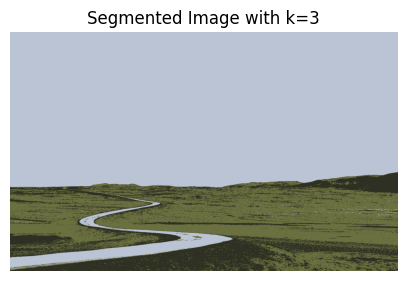

In [14]:
# Display the segmented image
plt.figure(figsize=(5, 5))
plt.title(f"Segmented Image with k={k}")
plt.imshow(segmented_image)
plt.axis('off')
plt.show()